### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from yellowbrick.regressor import PredictionError,ResidualsPlot

### Read and Display the data

In [2]:
data=pd.read_excel(r"C:\Users\pagad\Downloads\DS - Assignment Part 1 data set.xlsx")

In [3]:
data.head(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
data.tail(5)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5
413,2013.500000,6.5,90.45606,9,24.97433,121.54310,2,1097,63.9


In [5]:
df=data.rename(columns={'Transaction date':"Transaction Date",'House Age':'House Age','Distance from nearest Metro station (km)':'Distance From Nearest Metro Station','Number of convenience stores':'Convenience Stores','latitude':'Latitude','longitude':'Longitude','Number of bedrooms':"Bedrooms",'House size (sqft)':"House size",'House price of unit area':'House Price'})
df.head()

,Transaction Date,House Age,Distance From Nearest Metro Station,Convenience Stores,Latitude,Longitude,Bedrooms,House size,House Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [6]:
df.dtypes

Transaction Date                       float64
House Age                              float64
Distance From Nearest Metro Station    float64
Convenience Stores                       int64
Latitude                               float64
Longitude                              float64
Bedrooms                                 int64
House size                               int64
House Price                            float64
dtype: object

In [7]:
df.columns

Index(['Transaction Date', 'House Age', 'Distance From Nearest Metro Station',
       'Convenience Stores', 'Latitude', 'Longitude', 'Bedrooms', 'House size',
       'House Price'],
      dtype='object')

In [8]:
df.shape

(414, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction Date                     414 non-null    float64
 1   House Age                            414 non-null    float64
 2   Distance From Nearest Metro Station  414 non-null    float64
 3   Convenience Stores                   414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   Bedrooms                             414 non-null    int64  
 7   House size                           414 non-null    int64  
 8   House Price                          414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


### Preprocessing

In [10]:
df.describe() #statistical measurements 

,Transaction Date,House Age,Distance From Nearest Metro Station,Convenience Stores,Latitude,Longitude,Bedrooms,House size,House Price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [11]:
for column in df.columns:
    print(df[column].value_counts())
    print('*'*40)

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: Transaction Date, dtype: int64
****************************************
0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: House Age, Length: 236, dtype: int64
****************************************
289.32480     13
90.45606      11
492.23130      9
1360.13900     8
104.81010      8
              ..
4527.68700     1
401.88070      1
432.03850      1
472.17450      1
390.96960      1
Name: Distance From Nearest Metro Station, Length: 259, dtype: int64
****************************************
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: Convenience Stores, dtype: int64
****************************************
24.97433    14
24.98203  

In [12]:
df.isnull().sum() #show missing data

Transaction Date                       0
House Age                              0
Distance From Nearest Metro Station    0
Convenience Stores                     0
Latitude                               0
Longitude                              0
Bedrooms                               0
House size                             0
House Price                            0
dtype: int64

In [13]:
df[df.dtypes[df.dtypes!='object'].index] #checking numerical data

,Transaction Date,House Age,Distance From Nearest Metro Station,Convenience Stores,Latitude,Longitude,Bedrooms,House size,House Price
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


#### Data Visualizations

C:\Users\pagad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


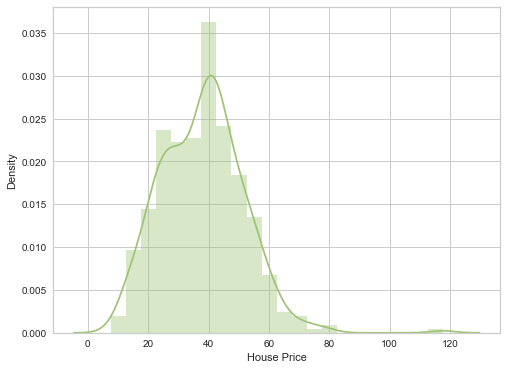

In [14]:
plt.figure(figsize=(8,6))
sns.distplot(df['House Price'],color='g')
plt.show()


C:\Users\pagad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


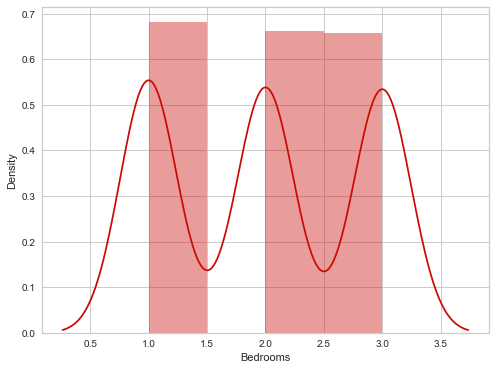

In [15]:
plt.figure(figsize=(8,6))
sns.distplot(df['Bedrooms'],color='r')
plt.show()

C:\Users\pagad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


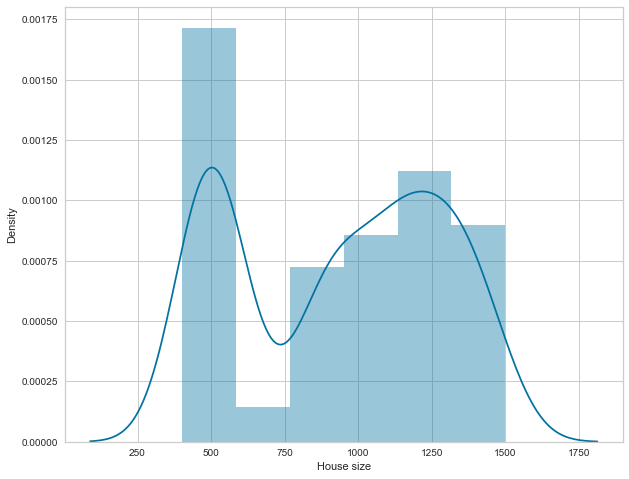

In [16]:
plt.figure(figsize=(10,8))
sns.distplot(df['House size'],color='b')
plt.show()

C:\Users\pagad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


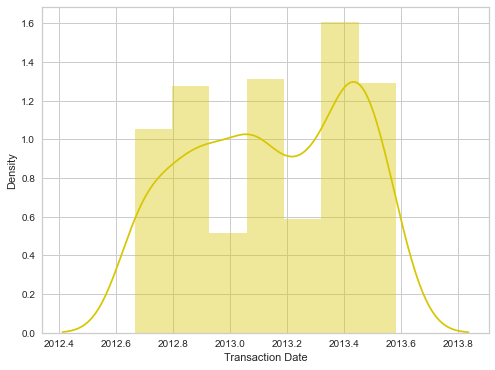

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(df['Transaction Date'],color='y')
plt.show()

C:\Users\pagad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

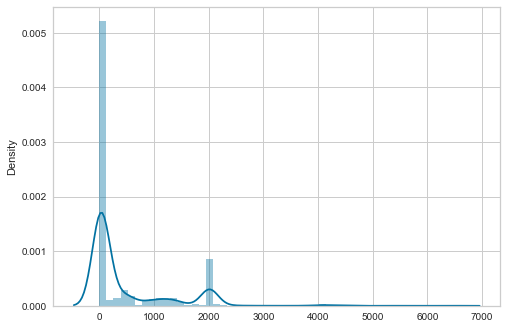

In [18]:
sns.distplot(df)

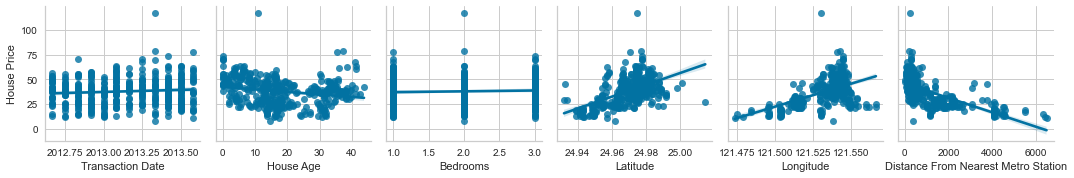

In [19]:
sns.pairplot(df,x_vars=["Transaction Date","House Age",'Bedrooms',"Latitude","Longitude","Distance From Nearest Metro Station"],y_vars="House Price",kind="reg")

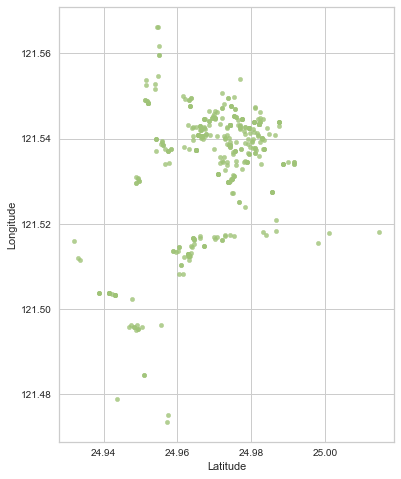

In [20]:
df.plot(kind='scatter',x='Latitude',y='Longitude',alpha=0.8,color='g',figsize=(6,8))
plt.show()

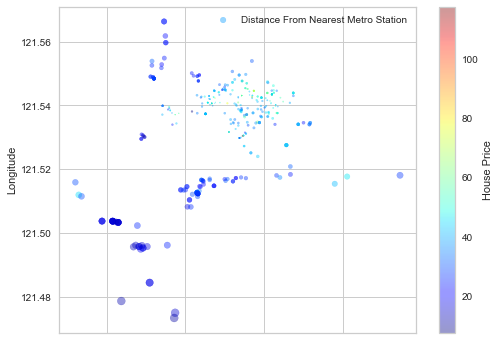

In [21]:
df.plot(kind='scatter',x='Latitude',y='Longitude', alpha=0.4,
       s=df['Distance From Nearest Metro Station']/100,
       label='Distance From Nearest Metro Station',
       c='House Price',
       cmap=plt.get_cmap('jet'),colorbar=True,figsize=(8,6)
       )
plt.legend()
plt.show()

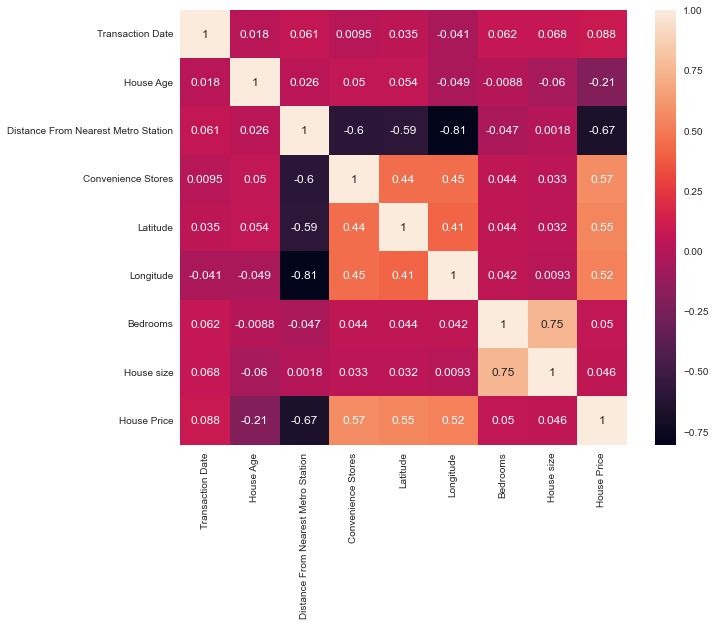

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

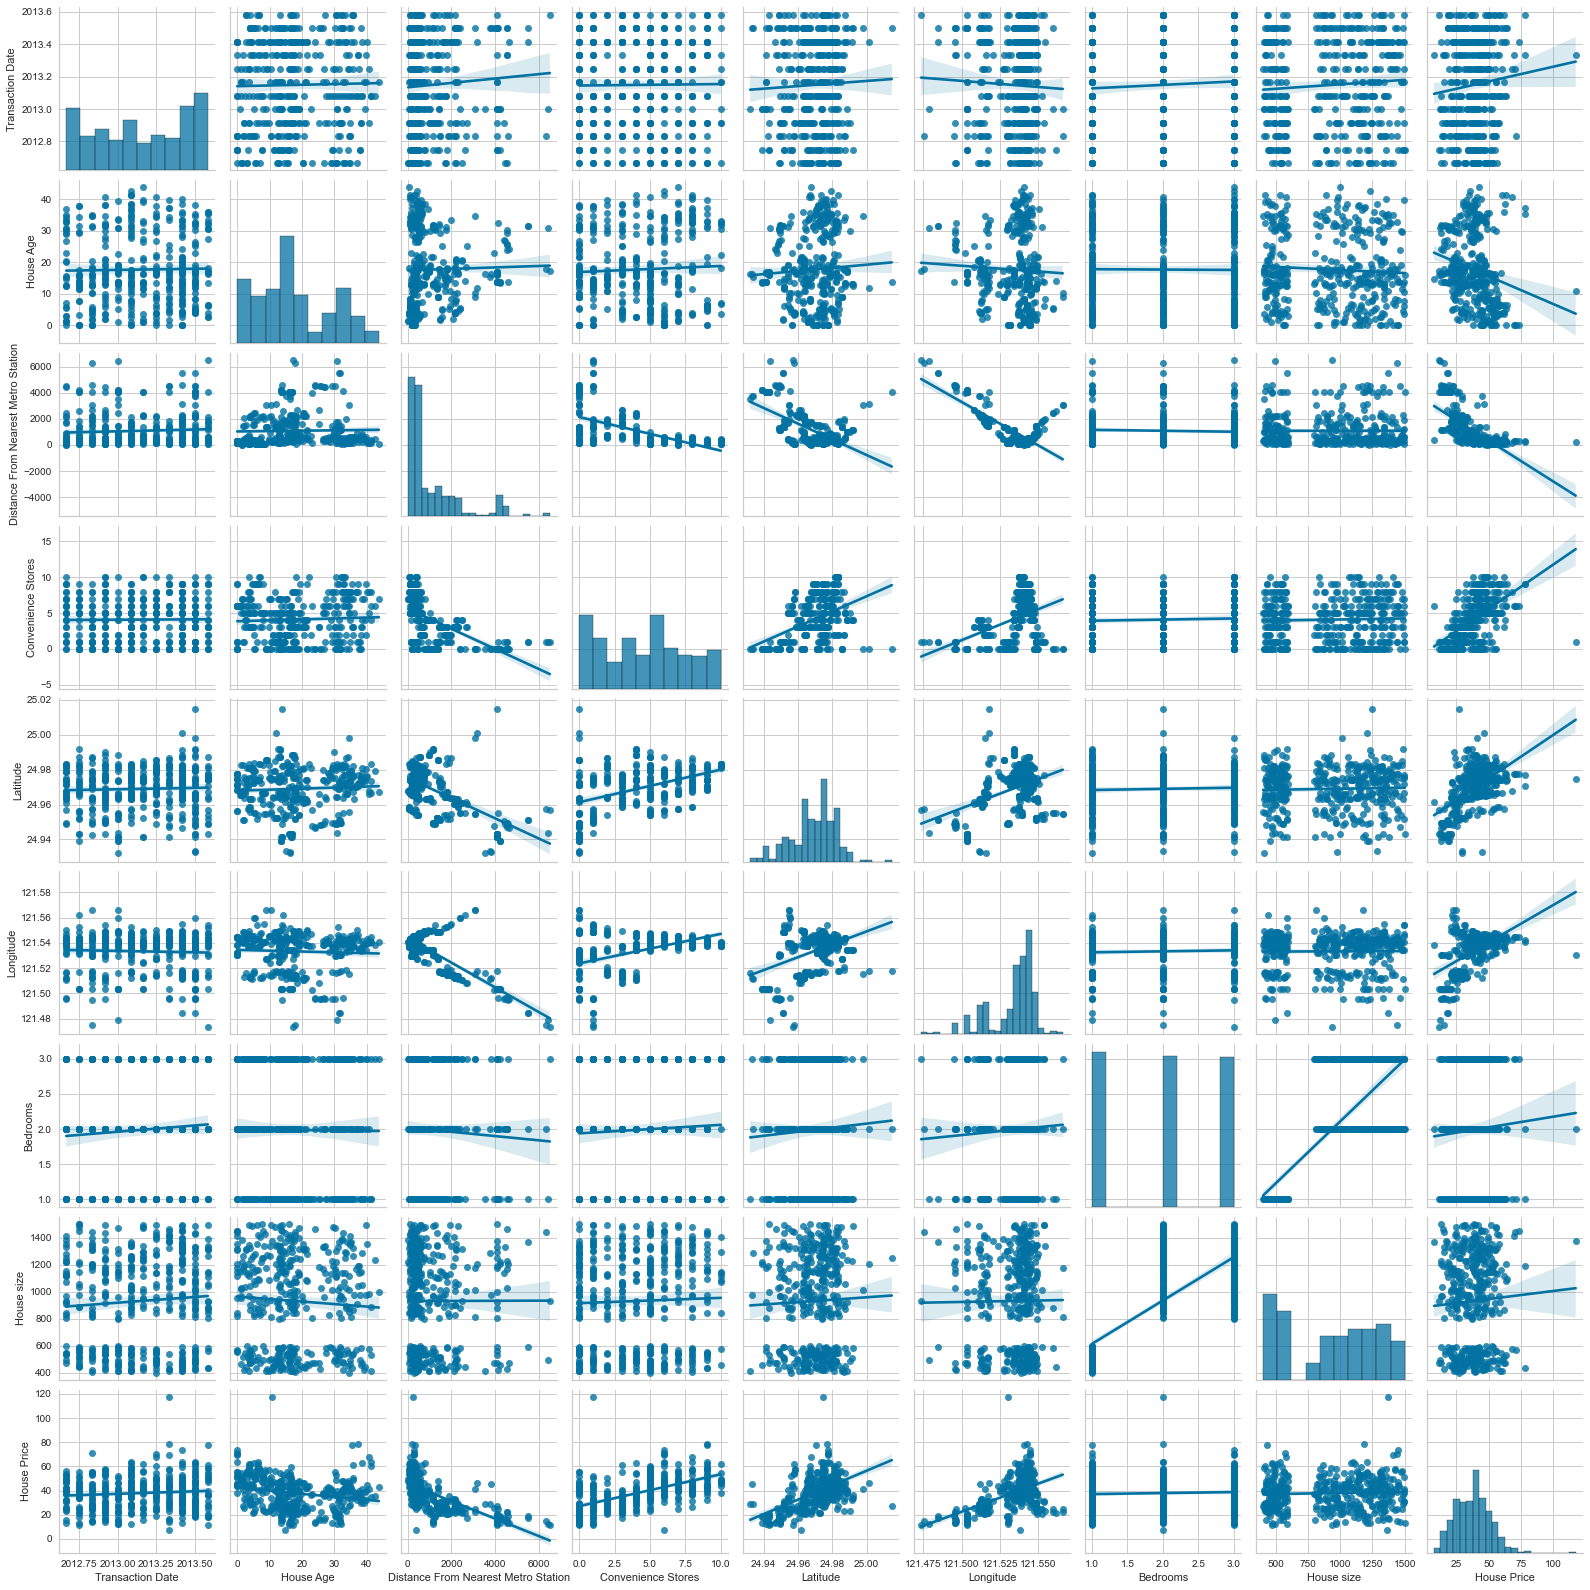

In [23]:
sns.pairplot(df,kind="reg")

### Splitting the data

In [24]:
X=df.drop(['House Price','Transaction Date'],axis=1)
Y=df['House Price']

### Traing and Testing the data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [26]:
x_train.shape

(331, 7)

In [27]:
y_test.shape

(83,)

In [28]:
x_test.shape

(83, 7)

In [29]:
y_train.shape

(331,)

### Model Evaluation

#### Model -Linear Regression

In [31]:
model=LinearRegression().fit(x_train,y_train)
model_pred=model.predict(x_test[:10])
model_pred


array([41.50572717, 34.80480664, 51.56557426, 42.1138462 , 47.47641603,
       28.60118952, 45.28735521, 47.55749541, 50.17796889, 30.01138668])

In [32]:
y_train[:10]

272    40.5
390    38.6
69     42.0
325    38.1
199    31.6
46     42.0
50     44.2
133    39.5
330    12.8
45     38.3
Name: House Price, dtype: float64

In [33]:
data={'Predicted':model_pred,'Actual':y_test[:10].values,'Diff':(model_pred-y_train[:10].values)}
error_df=pd.DataFrame(data=data)
error_df

,Predicted,Actual,Diff
0,41.505727,48.0,1.005727
1,34.804807,31.3,-3.795193
2,51.565574,59.5,9.565574
3,42.113846,34.1,4.013846
4,47.476416,48.6,15.876416
5,28.601190,26.6,-13.398810
6,45.287355,39.3,1.087355
7,47.557495,45.1,8.057495
8,50.177969,69.7,37.377969
9,30.011387,23.5,-8.288613


Text(0.5, 1.0, 'LinearRegression Model')

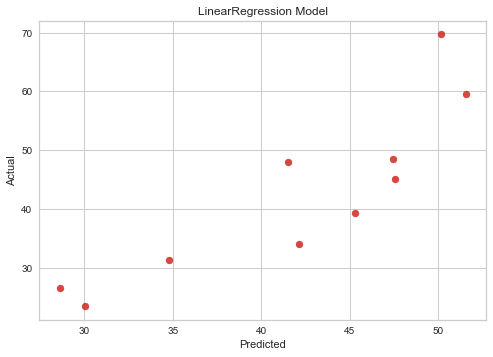

In [34]:
actual_values = y_test[:10]
plt.scatter(model_pred,actual_values,alpha=.75,
           color='r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LinearRegression Model')

In [36]:
pred=model.predict(x_test)

In [37]:
mae=mean_absolute_error(y_test,pred)
mae

5.421065009126717

In [38]:
#pip install yellowbrick

In [40]:
print("r2_score:",r2_score(y_test,pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,pred)))

r2_score: 0.6706304461258104
RMSE 7.012000719333291


C:\Users\pagad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


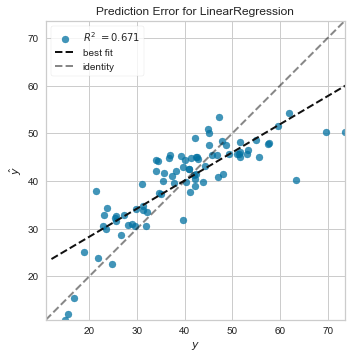

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
visualizer = PredictionError(model)
visualizer.fit(x_train,y_train)
visualizer.score(x_test,y_test)

visualizer.poof()

C:\Users\pagad\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


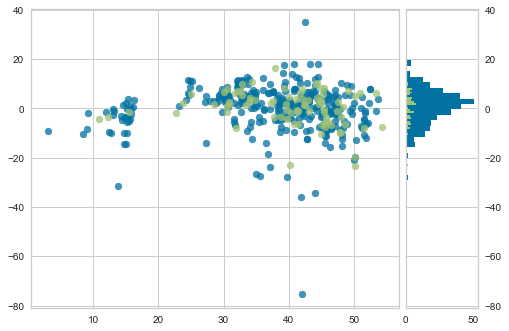

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
visualizer_res=ResidualsPlot(model)
visualizer_res.fit(x_train,y_train)
visualizer_res.score(x_test,y_test)
visualizer.poof()

#### Model-Support Vector Regression

In [43]:
svr=SVR() #model of support vector
svr.fit(x_train,y_train)
print("SVR Score",svr.score(x_test,y_test))
print("SVR RMSE",mean_squared_error(y_test,svr.predict(x_test)))

SVR Score 0.5804414198362099
SVR RMSE 62.63153553739307


#### Model-Ridge Regression

In [44]:
ridge=Ridge(alpha=0.01)

In [45]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.01)

In [46]:
pred1=ridge.predict(x_test)

In [47]:
print('R2 score',r2_score(y_test,pred1))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred1)))

R2 score 0.6698104930184725
RMSE 7.020723349976737


### Training of the data

In [48]:
scores=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=7) #cross validation model of training
rmse_score=np.sqrt(-scores)

In [49]:
rmse_score

array([ 7.87624033,  8.49365699,  9.0073215 ,  9.04254484,  9.24246018,
        9.22359271, 13.38716683])

In [50]:
rmse_score.mean()

9.467569054283107